
[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Training ARIMA model...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=840.293, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=842.068, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=841.773, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=838.322, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.388 seconds
Training SARIMA model...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=82.904, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=68.935, Time=0.40 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=55.591, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[12]            

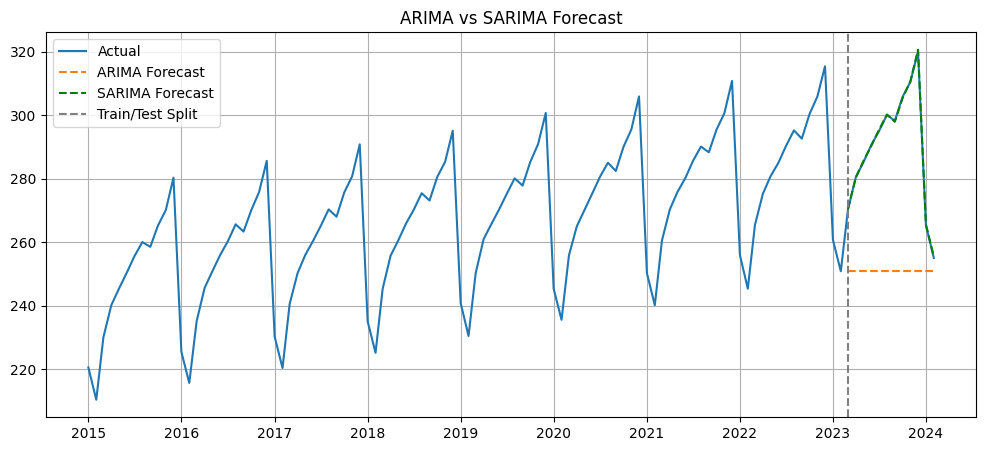


📊 Model Evaluation:
ARIMA  - MAE: 38.92, RMSE: 43.09
SARIMA - MAE: 0.29, RMSE: 0.32


In [ ]:
# -----------------------------------
# STEP 1: Install Required Package
# -----------------------------------
!pip install pmdarima --quiet

# -----------------------------------
# STEP 2: Import Libraries
# -----------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# -----------------------------------
#Load the Dataset
# -----------------------------------
df = pd.read_csv("simulated_zambia_tax_revenue.csv")
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)

# -----------------------------------
# Split Train/Test Sets
# -----------------------------------
train = df.iloc[:-12]
test = df.iloc[-12:]

# ------------------------------------------------------------------------------
# Fit ARIMA Model (auto-detect best p,d,q)
# --------------------------------------------------------------------------------
print("Training ARIMA model...")
arima_model = auto_arima(train, seasonal=False, trace=True)
forecast_arima = arima_model.predict(n_periods=12)

# ------------------------------------------------------------------------------------------
# Fit SARIMA Model (auto-detect best p,d,q)(P,D,Q,m)
# ------------------------------------------------------------------------------------------
print("Training SARIMA model...")
sarima_model = auto_arima(train, seasonal=True, m=12, trace=True)
forecast_sarima = sarima_model.predict(n_periods=12)

# --------------------------------------------------------------------------------------
# Plot Forecasts
# --------------------------------------------------------------------------------------
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['y'], label="Actual")
plt.plot(test.index, forecast_arima, label="ARIMA Forecast", linestyle='--')
plt.plot(test.index, forecast_sarima, label="SARIMA Forecast", linestyle='--', color='green')
plt.axvline(x=test.index[0], color='gray', linestyle='--', label='Train/Test Split')
plt.title("ARIMA vs SARIMA Forecast")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------------------------------------------
# Evaluate Both Models
# ---------------------------------------------------------------------------------------
mae_arima = mean_absolute_error(test['y'], forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(test['y'], forecast_arima))

mae_sarima = mean_absolute_error(test['y'], forecast_sarima)
rmse_sarima = np.sqrt(mean_squared_error(test['y'], forecast_sarima))

print("\n📊 Model Evaluation:")
print(f"ARIMA  - MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}")
print(f"SARIMA - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}")


In [ ]:
#comparison table
comparison_df = pd.DataFrame({
    "Date": test.index,
    "Actual Revenue": test['y'].values,
    "ARIMA Forecast": forecast_arima,
    "SARIMA Forecast": forecast_sarima
})

print(comparison_df.head())


                 Date  Actual Revenue  ARIMA Forecast  SARIMA Forecast
2023-03-01 2023-03-01           270.3           250.8       270.414162
2023-04-01 2023-04-01           280.5           250.8       280.355048
2023-05-01 2023-05-01           285.2           250.8       285.604077
2023-06-01 2023-06-01           290.7           250.8       290.370439
2023-07-01 2023-07-01           295.0           250.8       295.388657


In [ ]:
# row with metrics
metrics_row = {
    "Date": "Metrics ↓",
    "Actual Revenue": "",
    "ARIMA Forecast": f"MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}",
    "SARIMA Forecast": f"MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}"
}

comparison_df = pd.concat([comparison_df, pd.DataFrame([metrics_row])], ignore_index=True)


In [8]:
comparison_df.to_csv("tax_forecast_comparison.csv", index=False)
